<h1> The Breast Cancer Classification using Python Libraries <h1>

<b>Import of the libraries for the classification of the dataset.</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB

<b>Importing of the dataset into the pandas dataframe.</b>

In [2]:
raw_data = pd.read_csv('Breast_cancer_data.csv')

<b>The top 5 rows of the dataset.</b>

In [3]:
raw_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<b>The columns/features of the breast cancer dataset.</b>

In [4]:
raw_data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

<b>The dataset's features/columns datatypes. </b>

In [5]:
raw_data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

<b>The descriptive statistics of the breast cancer dataset.</b>

In [6]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


<b>The information of the breast cancer dataset.</b>

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [8]:
raw_data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<b>The creation of the dummy dataframe.</b>

In [9]:
Data = raw_data

<b>The data division into two dataframe data structures i.e., Features and Class Labels</b>

In [10]:
X = Data.drop(['diagnosis'], axis=1)
y = Data['diagnosis']

<b>Division of the dataset in the ratio of the 7:3 in the training and testing data respectively.</b>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state = 1)

<b>The gaussian Naive Bayes model for the breast cancer classification. </b>

In [12]:
gnb = GaussianNB()

<b>The fitting of the gaussian  Naive Bayes model.</b>

In [13]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

<b>Predicting the test data class label by learning the fitted method and providing the test dayasey</b>

In [14]:
nb_y_pred = gnb.predict(X_test)

<b>Importing the congusion matrix function for the model evaluation.</b>

In [15]:
from sklearn import metrics

<b>The creation of confusion matrix from the result.</b>

In [16]:
Confusion = metrics.confusion_matrix(y_test, nb_y_pred)

In [17]:
Confusion

array([[ 49,  14],
       [  8, 100]], dtype=int64)

<b>The heatmap representation of the confustion matrix.</b>

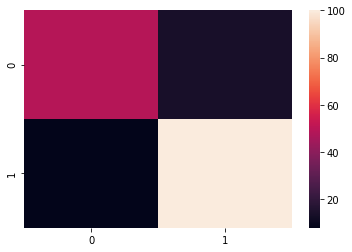

In [18]:
sns.heatmap(Confusion)

<b>The accuracy of the gaussian Naive Bayes model for the Breast Cancer classification.

In [19]:
print('Accuracy of Naive Bayes Classifier is: ', gnb.score(X_test,y_test) * 100,'%')

Accuracy of Naive Bayes Classifier is:  87.13450292397661 %


<b>The division of of the confusin matrix into the:
    <ol>
        <li>True Positive</li>
        <li>True Negative</li>
        <li>False Positive</li>
        <li>False Negative</li>
    </ol>

In [20]:
nb_TP = Confusion[1, 1]
nb_TN = Confusion[0, 0]
nb_FP = Confusion[0, 1]
nb_FN = Confusion[1, 0]

<b>The Precision of the Gaussian Naive Bayes for the Breast Cancer Classification

In [21]:
nb_Precision = nb_TP / ( nb_TP + nb_FP)
print ('Precision: ', nb_Precision)

Precision:  0.8771929824561403


<b>The Recall of the Gaussian Naive Bayes for the Breast Cancer Classification

In [22]:
nb_Recall = nb_TP / ( nb_TP + nb_FN )
print ('Recall: ', nb_Recall)

Recall:  0.9259259259259259


<b>The F1 Score of the Gaussian Naive Bayes for the Breast Cancer Classification

In [23]:
metrics.f1_score(y_test, nb_y_pred)

0.9009009009009009

<b>The Specificity of the Gaussian Naive Bayes for the Breast Cancer Classification

In [24]:
nb_Specificity = nb_TN / ( nb_TN + nb_FP )
print ('Specificity: ', nb_Specificity)

Specificity:  0.7777777777777778


<b>The Sensitivity of the Gaussian Naive Bayes for the Breast Cancer Classification

In [25]:
nb_Sensitivity = nb_TP / ( nb_TP + nb_FN )
print ('Sensitivity: ', nb_Sensitivity)

Sensitivity:  0.9259259259259259


<b>The ROC (Receiver Operating Characteristic) & AUC (Area Under Curve) of the Gaussian Naive Bayes for the Breast Cancer Classification

In [26]:
nb_Roc_Auc = metrics.roc_auc_score(y_test,nb_y_pred)
print ('ROC AUC Score: ', nb_Roc_Auc)

ROC AUC Score:  0.8518518518518519


<b> The ROC Curve visualization for the classification of the Breast cancer classifcation using the gaussian Naive bayes dataset.

In [27]:
nb_y_pred_prob = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,nb_y_pred_prob)

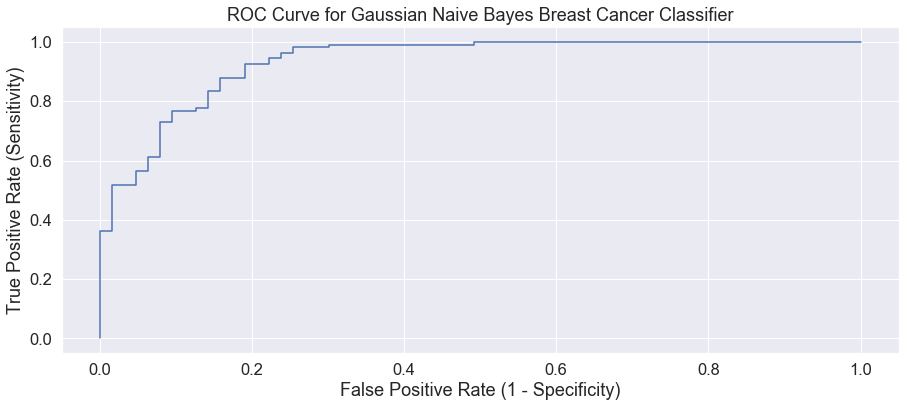

In [28]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
plt.plot(fpr, tpr)
plt.title('ROC Curve for Gaussian Naive Bayes Breast Cancer Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)